In [1]:
library(arules)
library(arulesViz)
library(tidyverse)
library(gridExtra)
library(grid)
library(ggplotify)
library(arulesCBA)
library(caret)

Warning message:
“package ‘arules’ was built under R version 3.6.3”
Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write


Loading required package: grid

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 3.6.3”
Warning message:
“package ‘tibble’ was built under R version 3.6.3”
Warning message:
“package ‘tidyr’ was built under R version 3.6.3”
Warning message:
“package ‘readr’ was built under R version 3.6.3”
Warning message:
“package ‘purrr’ was built under R version 3.6.3”
Warning message:
“package ‘dplyr’ was built under R version 3.6.3”
Warning message:
“package ‘stringr’ was built under R version 3.6.3”
Warning message:
“package ‘forcats’ was built under R v

In [2]:
tdata <- read.csv('./Data/AssociationRules/All_Female_bool.csv',sep=",")

#convert everything to categorical factors
col_names <- names(tdata)
tdata[,col_names] <- lapply(tdata[,col_names] , factor)

In [3]:
set.seed(1234)

train_indexes <- sample(1:nrow(tdata),floor(nrow(tdata)*0.8), replace=FALSE)

train <- tdata[train_indexes,]
test <- tdata[-train_indexes,]

nrow(train)
nrow(test)

trans <- as(tdata, 'transactions')
test_trans <- as(test, "transactions")
train_trans <- as(train, 'transactions')

items <- grep("(*=1)", itemLabels(trans), value = TRUE)
items <- grep("[^grading=1]",items,value=TRUE)
items <- grep("[^grading=0]",items,value=TRUE)
items <- grep("[^gender=1]",items,value=TRUE)
items <- grep("[^gender=0]",items,value=TRUE)

[1] 252

[1] 63

In [4]:
items

[1] "CAMKK2_rare_AR=1"  "WDR27_rare_AR=1"   "PKHD1L1_rare_AR=1"
  [4] "NKX2.3_rare_AR=1"  "TNFAIP2_rare_AR=1" "OR51B5_rare_AR=1" 
  [7] "TACR2_rare_AR=1"   "HRCT1_rare_AR=1"   "CAPN15_rare_AD=1" 
 [10] "CASKIN1_rare_AD=1" "GRM6_rare_AD=1"    "APBA3_rare_AD=1"  
 [13] "BLK_rare_AD=1"     "LRP8_rare_AD=1"    "ZC3H3_rare_AD=1"  
 [16] "AKAP17A_rare_AD=1" "PLEKHG4_rare_AD=1" "EXPH5_rare_AD=1"  
 [19] "APOL3_rare_AD=1"   "MLPH_rare_AD=1"    "TICRR_rare_AD=1"  
 [22] "IQCA1_rare_AD=1"   "SFMBT2_rare_AD=1"  "INTS1_rare_AD=1"  
 [25] "TENM1_rare_AD=1"   "SPINT1_rare_AD=1"  "TASOR_rare_AD=1"  
 [28] "AFTPH_rare_AD=1"   "GSN_rare_AD=1"     "ITGA7_rare_AD=1"  
 [31] "FIP1L1_rare_AD=1"  "ZNF808_rare_AD=1"  "NIBAN3_rare_AD=1" 
 [34] "CD48_rare_AD=1"    "TAS1R1_rare_AD=1"  "SNED1_rare_AD=1"  
 [37] "FARP2_rare_AD=1"   "MASP1_rare_AD=1"   "KRT26_rare_AD=1"  
 [40] "PXDN_rare_AD=1"    "TLR5_rare_AD=1"    "ATG9B_rare_AD=1"  
 [43] "DLEC1_rare_AD=1"   "MYH2_rare_AD=1"    "STXBP5L_2=1"      
 [46] "FHOD3_3=1"         "SLC15A4_1=1"       "EP300_1=1"        
 [49] "PDE11A_2=1"        "HOXC4_1=1"         "DLEC1_2=1"        
 [52] "FNDC9_1=1"         "FBXL22_1=1"        "LSR_1=1"          
 [55] "IRX5_1=1"          "ALDH3A1_2=1"       "RNF212_1=1"       
 [58] "SVIL_1=1"          "GSTM3_1=1"         "SYT8_5=1"         
 [61] "HAPLN3_2=1"        "F5_2=1"            "ALK_3=1"          
 [64] "HERC5_1=1"         "IGFBP2_1=1"        "IBSP_4=1"         
 [67] "MYO1H_1=1"         "PTPRU_1=1"         "NCOA3_1=1"        
 [70] "RNF149_1=1"        "LRRC61_1=1"        "LOC100506422_1=1" 
 [73] "PPP1R9A_1=1"       "HEXD_1=1"          "SLC24A3_1=1"      
 [76] "BCAT2_1=1"         "EPCAM_1=1"         "FABP1_1=1"        
 [79] "MYO1H_3=1"         "CHPT1_1=1"         "GJE1_1=1"         
 [82] "TMEM40_2=1"        "C1orf109_1=1"      "DNASE2B_2=1"      
 [85] "ALCAM_2=1"         "OR13C2_1=1"        "ARHGAP25_1=1"     
 [88] "TXLNB_1=1"         "SLC25A43_1_homo=1" "IL17RC_1_homo=1"  
 [91] "TIGD4_1_homo=1"    "RBM11_1_homo=1"    "SPATA5L1_1_homo=1"
 [94] "POLI_1_homo=1"     "CFHR1_1_homo=1"    "CFHR4_1_homo=1"   
 [97] "FASTKD3_1_homo=1"  "MCAT_1_homo=1"     "CD52_1_homo=1"    
[100] "EPCAM_1_homo=1"    "APOBEC1_1_homo=1"  "CCDC61_1_homo=1"  
[103] "RALY_1_homo=1"     "A2ML1_2_homo=1"    "ZNF749_1_homo=1"  
[106] "TMEM159_1_homo=1"  "NBPF3_1_homo=1"    "CILP_3_homo=1"    
[109] "FGF21_1_homo=1"    "USP44_1_homo=1"    "COL6A3_3_homo=1"  
[112] "FAM184B_2_homo=1"  "MTRR_2_homo=1"     "CHPT1_1_homo=1"   
[115] "DISP3_1_homo=1"    "MTHFD1_1_homo=1"   "COQ7_1_homo=1"    
[118] "RMI1_1_homo=1"     "PRSS55_1_homo=1"   "RHBDF2_1_homo=1"  
[121] "TXNRD1_1_homo=1"   "TP53_1_homo=1"

In [6]:
support <- c(0.007, 0.01, 0.02, 0.05)
confidence <- c(0.5, 0.6, 0.7, 0.8, 0.9)

stats <- data.frame(support=double(),
                 confidence=double(),
                 pvalue=double(),
                 lift=double(),
                 rules=integer(),
                 stringsAsFactors=FALSE)

for(i in 1:length(support)) {
    for (j in 1:length(confidence)){
       
        #extract rules and compute pvalue
        rules <- apriori(data=train_trans, parameter=list(supp=support[i], conf=confidence[j], minlen=2), 
                 appearance = list(lhs = items, rhs=grep("grading=", itemLabels(trans), value = TRUE)), 
                         control = list (verbose=T)) 
        
        #compute p-value
        quality(rules) <- cbind(quality(rules), 
                        pvalue = interestMeasure(rules, measure = "fishersExactTest",
                                                          transactions = train_trans, adjust='none', reuse=TRUE))
        
        #extract median lift and pvalue and store number of extracted rules 
        pvalue <- median(quality(rules)$pvalue)
        lift <- median(quality(rules)$lift)
        count <- length(rules)
        
        #add elements to dataframe
        stats <- rbind(stats, data.frame(support = support[i], confidence=confidence[j], 
                                         pvalue = pvalue, lift = lift, count = count))
        
        message(paste("Support:",support[i],"Confidence:",confidence[j],"Rules:",count,"p-value:",pvalue, '\n'))    

    }
}

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5   0.007      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[124 item(s)] done [0.00s].
set transactions ...[124 item(s), 252 transaction(s)] done [0.00s].
sorting and recoding items ... [124 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6

Warning message in apriori(data = train_trans, parameter = list(supp = support[i], :
“Mining stopped (time limit reached). Only patterns up to a length of 6 returned!”


 done [28.17s].
writing ... [27661458 rule(s)] done [8.79s].
creating S4 object  ... done [8.29s].


Support: 0.007 Confidence: 0.5 Rules: 27661458 p-value: 0.252988047808765 




Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5   0.007      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[124 item(s)] done [0.00s].
set transactions ...[124 item(s), 252 transaction(s)] done [0.00s].
sorting and recoding items ... [124 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6

Warning message in apriori(data = train_trans, parameter = list(supp = support[i], :
“Mining stopped (time limit reached). Only patterns up to a length of 6 returned!”


 done [27.15s].
writing ... [22728411 rule(s)] done [8.34s].
creating S4 object  ... done [7.15s].


Support: 0.007 Confidence: 0.6 Rules: 22728411 p-value: 0.252988047808765 




Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.7    0.1    1 none FALSE            TRUE       5   0.007      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[124 item(s)] done [0.00s].
set transactions ...[124 item(s), 252 transaction(s)] done [0.00s].
sorting and recoding items ... [124 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6

Warning message in apriori(data = train_trans, parameter = list(supp = support[i], :
“Mining stopped (time limit reached). Only patterns up to a length of 6 returned!”


 done [27.82s].
writing ... [16187113 rule(s)] done [7.80s].
creating S4 object  ... done [6.23s].


Support: 0.007 Confidence: 0.7 Rules: 16187113 p-value: 0.245051539872257 




Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.007      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[124 item(s)] done [0.00s].
set transactions ...[124 item(s), 252 transaction(s)] done [0.00s].
sorting and recoding items ... [124 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6

Warning message in apriori(data = train_trans, parameter = list(supp = support[i], :
“Mining stopped (time limit reached). Only patterns up to a length of 6 returned!”


 done [28.30s].
writing ... [13143511 rule(s)] done [7.74s].
creating S4 object  ... done [6.54s].


Support: 0.007 Confidence: 0.8 Rules: 13143511 p-value: 0.245051539872257 




Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.9    0.1    1 none FALSE            TRUE       5   0.007      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[124 item(s)] done [0.00s].
set transactions ...[124 item(s), 252 transaction(s)] done [0.00s].
sorting and recoding items ... [124 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6

Warning message in apriori(data = train_trans, parameter = list(supp = support[i], :
“Mining stopped (time limit reached). Only patterns up to a length of 6 returned!”


 done [27.07s].
writing ... [11096388 rule(s)] done [7.69s].
creating S4 object  ... done [5.43s].


Support: 0.007 Confidence: 0.9 Rules: 11096388 p-value: 0.245051539872257 




Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5    0.01      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 2 

set item appearances ...[124 item(s)] done [0.00s].
set transactions ...[124 item(s), 252 transaction(s)] done [0.00s].
sorting and recoding items ... [124 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6

Warning message in apriori(data = train_trans, parameter = list(supp = support[i], :
“Mining stopped (time limit reached). Only patterns up to a length of 6 returned!”


 done [17.79s].
writing ... [15629813 rule(s)] done [6.09s].
creating S4 object  ... done [5.07s].


Support: 0.01 Confidence: 0.5 Rules: 15629813 p-value: 0.21677178413802 




Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5    0.01      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 2 

set item appearances ...[124 item(s)] done [0.00s].
set transactions ...[124 item(s), 252 transaction(s)] done [0.00s].
sorting and recoding items ... [124 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6

Warning message in apriori(data = train_trans, parameter = list(supp = support[i], :
“Mining stopped (time limit reached). Only patterns up to a length of 6 returned!”


 done [17.81s].
writing ... [12399764 rule(s)] done [5.05s].
creating S4 object  ... done [5.08s].


Support: 0.01 Confidence: 0.6 Rules: 12399764 p-value: 0.135447145754679 




Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.7    0.1    1 none FALSE            TRUE       5    0.01      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 2 

set item appearances ...[124 item(s)] done [0.00s].
set transactions ...[124 item(s), 252 transaction(s)] done [0.00s].
sorting and recoding items ... [124 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6

Warning message in apriori(data = train_trans, parameter = list(supp = support[i], :
“Mining stopped (time limit reached). Only patterns up to a length of 6 returned!”


 done [17.94s].
writing ... [9071118 rule(s)] done [4.99s].
creating S4 object  ... done [3.34s].


Support: 0.01 Confidence: 0.7 Rules: 9071118 p-value: 0.126494023904383 




Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.01      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 2 

set item appearances ...[124 item(s)] done [0.00s].
set transactions ...[124 item(s), 252 transaction(s)] done [0.00s].
sorting and recoding items ... [124 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6

Warning message in apriori(data = train_trans, parameter = list(supp = support[i], :
“Mining stopped (time limit reached). Only patterns up to a length of 6 returned!”


 done [17.83s].
writing ... [6027516 rule(s)] done [4.38s].
creating S4 object  ... done [2.76s].


Support: 0.01 Confidence: 0.8 Rules: 6027516 p-value: 0.12056535761715 




Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.9    0.1    1 none FALSE            TRUE       5    0.01      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 2 

set item appearances ...[124 item(s)] done [0.00s].
set transactions ...[124 item(s), 252 transaction(s)] done [0.00s].
sorting and recoding items ... [124 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6

Warning message in apriori(data = train_trans, parameter = list(supp = support[i], :
“Mining stopped (time limit reached). Only patterns up to a length of 6 returned!”


 done [17.82s].
writing ... [3980393 rule(s)] done [4.24s].
creating S4 object  ... done [2.36s].


Support: 0.01 Confidence: 0.9 Rules: 3980393 p-value: 0.12056535761715 




Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5    0.02      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 5 

set item appearances ...[124 item(s)] done [0.00s].
set transactions ...[124 item(s), 252 transaction(s)] done [0.00s].
sorting and recoding items ... [123 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6

Warning message in apriori(data = train_trans, parameter = list(supp = support[i], :
“Mining stopped (time limit reached). Only patterns up to a length of 6 returned!”


 done [8.45s].
writing ... [4774850 rule(s)] done [1.88s].
creating S4 object  ... done [1.55s].


Support: 0.02 Confidence: 0.5 Rules: 4774850 p-value: 0.145819781352476 




Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5    0.02      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 5 

set item appearances ...[124 item(s)] done [0.00s].
set transactions ...[124 item(s), 252 transaction(s)] done [0.00s].
sorting and recoding items ... [123 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6

Warning message in apriori(data = train_trans, parameter = list(supp = support[i], :
“Mining stopped (time limit reached). Only patterns up to a length of 6 returned!”


 done [8.44s].
writing ... [3636580 rule(s)] done [1.82s].
creating S4 object  ... done [1.39s].


Support: 0.02 Confidence: 0.6 Rules: 3636580 p-value: 0.0898037318278988 




Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.7    0.1    1 none FALSE            TRUE       5    0.02      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 5 

set item appearances ...[124 item(s)] done [0.00s].
set transactions ...[124 item(s), 252 transaction(s)] done [0.00s].
sorting and recoding items ... [123 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6

Warning message in apriori(data = train_trans, parameter = list(supp = support[i], :
“Mining stopped (time limit reached). Only patterns up to a length of 6 returned!”


 done [8.18s].
writing ... [2339420 rule(s)] done [1.55s].
creating S4 object  ... done [1.09s].


Support: 0.02 Confidence: 0.7 Rules: 2339420 p-value: 0.04854285701474 




Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.02      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 5 

set item appearances ...[124 item(s)] done [0.00s].
set transactions ...[124 item(s), 252 transaction(s)] done [0.00s].
sorting and recoding items ... [123 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6

Warning message in apriori(data = train_trans, parameter = list(supp = support[i], :
“Mining stopped (time limit reached). Only patterns up to a length of 6 returned!”


 done [8.21s].
writing ... [1256832 rule(s)] done [1.47s].
creating S4 object  ... done [0.92s].


Support: 0.02 Confidence: 0.8 Rules: 1256832 p-value: 0.0168464927943185 




Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.9    0.1    1 none FALSE            TRUE       5    0.02      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 5 

set item appearances ...[124 item(s)] done [0.00s].
set transactions ...[124 item(s), 252 transaction(s)] done [0.00s].
sorting and recoding items ... [123 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6

Warning message in apriori(data = train_trans, parameter = list(supp = support[i], :
“Mining stopped (time limit reached). Only patterns up to a length of 6 returned!”


 done [8.28s].
writing ... [450124 rule(s)] done [1.35s].
creating S4 object  ... done [0.74s].


Support: 0.02 Confidence: 0.9 Rules: 450124 p-value: 0.00759029958244515 




Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5    0.05      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 12 

set item appearances ...[124 item(s)] done [0.00s].
set transactions ...[124 item(s), 252 transaction(s)] done [0.00s].
sorting and recoding items ... [116 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 7 8 9 10

Warning message in apriori(data = train_trans, parameter = list(supp = support[i], :
“Mining stopped (maxlen reached). Only patterns up to a length of 10 returned!”


 done [4.63s].
writing ... [702408 rule(s)] done [0.38s].
creating S4 object  ... done [0.37s].


Support: 0.05 Confidence: 0.5 Rules: 702408 p-value: 0.0454485960729455 




Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5    0.05      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 12 

set item appearances ...[124 item(s)] done [0.00s].
set transactions ...[124 item(s), 252 transaction(s)] done [0.00s].
sorting and recoding items ... [116 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 7 8 9 10

Warning message in apriori(data = train_trans, parameter = list(supp = support[i], :
“Mining stopped (maxlen reached). Only patterns up to a length of 10 returned!”


 done [4.61s].
writing ... [550445 rule(s)] done [0.37s].
creating S4 object  ... done [0.33s].


Support: 0.05 Confidence: 0.6 Rules: 550445 p-value: 0.0225802774106707 




Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.7    0.1    1 none FALSE            TRUE       5    0.05      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 12 

set item appearances ...[124 item(s)] done [0.00s].
set transactions ...[124 item(s), 252 transaction(s)] done [0.00s].
sorting and recoding items ... [116 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 7 8 9 10

Warning message in apriori(data = train_trans, parameter = list(supp = support[i], :
“Mining stopped (maxlen reached). Only patterns up to a length of 10 returned!”


 done [4.62s].
writing ... [345621 rule(s)] done [0.35s].
creating S4 object  ... done [0.30s].


Support: 0.05 Confidence: 0.7 Rules: 345621 p-value: 0.00827549650612019 




Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.05      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 12 

set item appearances ...[124 item(s)] done [0.00s].
set transactions ...[124 item(s), 252 transaction(s)] done [0.00s].
sorting and recoding items ... [116 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 7 8 9 10

Warning message in apriori(data = train_trans, parameter = list(supp = support[i], :
“Mining stopped (maxlen reached). Only patterns up to a length of 10 returned!”


 done [4.62s].
writing ... [155646 rule(s)] done [0.32s].
creating S4 object  ... done [0.26s].


Support: 0.05 Confidence: 0.8 Rules: 155646 p-value: 0.00175846582218751 




Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.9    0.1    1 none FALSE            TRUE       5    0.05      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 12 

set item appearances ...[124 item(s)] done [0.00s].
set transactions ...[124 item(s), 252 transaction(s)] done [0.00s].
sorting and recoding items ... [116 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 7 8 9 10

Warning message in apriori(data = train_trans, parameter = list(supp = support[i], :
“Mining stopped (maxlen reached). Only patterns up to a length of 10 returned!”


 done [4.63s].
writing ... [35770 rule(s)] done [0.30s].
creating S4 object  ... done [0.23s].


Support: 0.05 Confidence: 0.9 Rules: 35770 p-value: 0.000313723975793446 




In [7]:
fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}

In [8]:
stats_grading <- stats
stats_grading$support <- as.factor(stats$support)

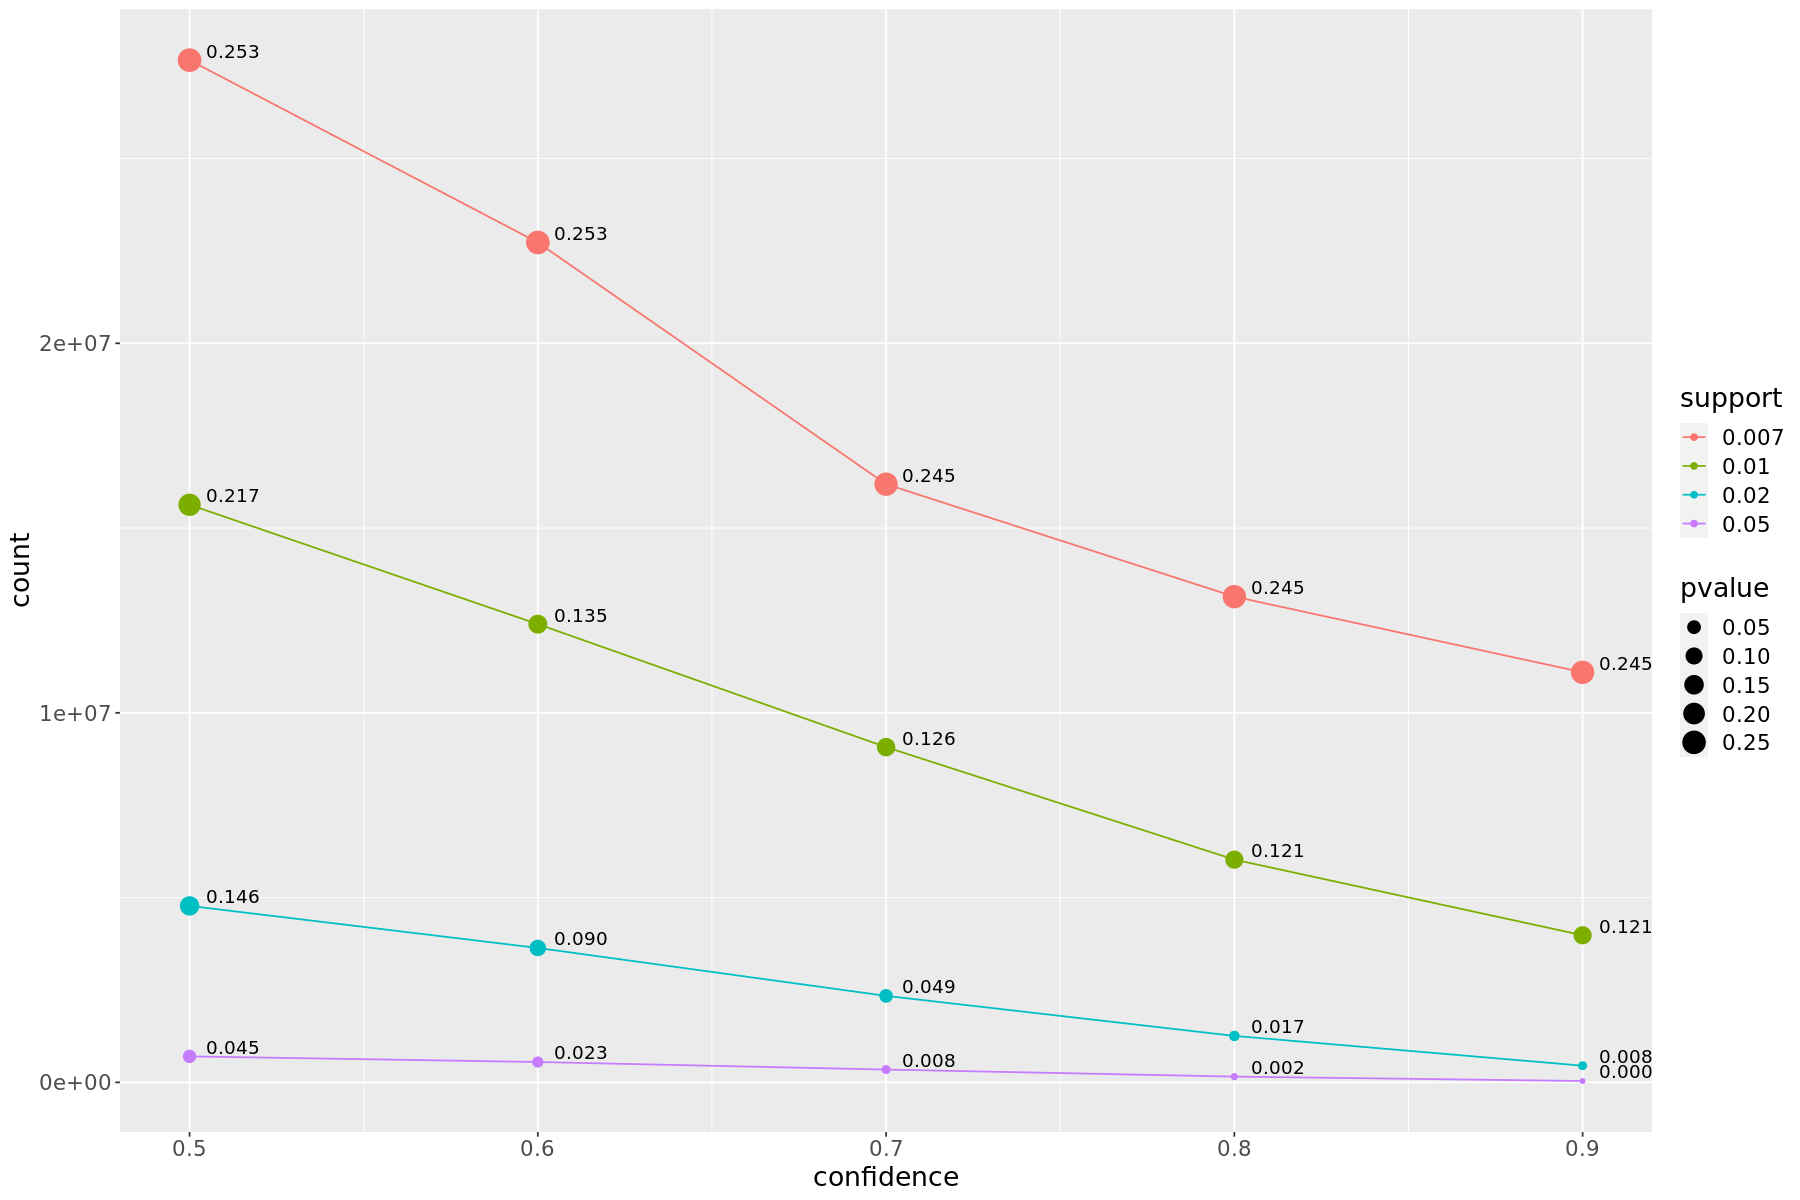

In [9]:
fig(15,10)
ggplot(data = stats_grading, aes(x=confidence, y=count)) + 
                geom_point(aes(colour=support, size=pvalue)) + 
                geom_text(aes(label=sprintf("%0.3f", round(pvalue, digits = 3))),hjust=-0.3, vjust=-0.2) +
                geom_line(aes(colour=support))+
                theme(text=element_text(size=16))

fig(7,7)

# Rules Extraction

In [10]:
target = grep("grading=", itemLabels(trans), value = TRUE)
target

[1] "grading=0" "grading=1"

In [18]:
rules <- apriori(data=train_trans, parameter=list(supp=0.02, conf=0.8, minlen=2), 
                 appearance = list(lhs = items, rhs=target), 
                         control = list (verbose=T))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.02      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 5 

set item appearances ...[124 item(s)] done [0.00s].
set transactions ...[124 item(s), 252 transaction(s)] done [0.00s].
sorting and recoding items ... [123 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6

Warning message in apriori(data = train_trans, parameter = list(supp = 0.02, conf = 0.8, :
“Mining stopped (time limit reached). Only patterns up to a length of 6 returned!”


 done [8.23s].
writing ... [1256832 rule(s)] done [1.48s].
creating S4 object  ... done [0.88s].


In [19]:
sig_rules <- rules[is.significant(rules, 
                                      train, 
                                      method='fisher', 
                                      alpha=0.05, 
                                      adjust='none')]
length(sig_rules)

[1] 951613

In [20]:
quality(sig_rules) <- cbind(quality(sig_rules), 
                        pvalue_test = interestMeasure(sig_rules, measure = "fishersExactTest",
                                                          transactions = test_trans, adjust='none', reuse=FALSE))

In [21]:
final_rules <- subset(sig_rules, pvalue_test < 0.05/length(sig_rules)) #bonferroni = alpha/n_tests
length(final_rules)

[1] 2001

In [22]:
inspect(head(final_rules, by = "support", decreasing=TRUE, 100))

      lhs                   rhs            support confidence   coverage     lift count  pvalue_test
[1]   {PDE11A_2=1,                                                                                  
       PTPRU_1=1,                                                                                   
       PPP1R9A_1=1,                                                                                 
       MTHFD1_1_homo=1}  => {grading=1} 0.12698413  0.8648649 0.14682540 1.716110    32 8.414474e-09
[2]   {PDE11A_2=1,                                                                                  
       PTPRU_1=1,                                                                                   
       PPP1R9A_1=1,                                                                                 
       HEXD_1=1}         => {grading=1} 0.12698413  0.8205128 0.15476190 1.628104    32 8.414474e-09
[3]   {PDE11A_2=1,                                                                         

In [24]:
write(final_rules,
      file = "./Results/rules_females_full.csv",
      sep = ",",
      quote = TRUE,
      row.names = FALSE)